In [252]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('train_V2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.
So it is a Regression Problem

#### object_columns = ['Id','groupId','matchId','matchDuration','matchType']

In [4]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
# Since the dataset is huge , we are taking 2 thousand matches data only

unique_matches = df['matchId'].unique()[:2000]

new_df = df[df['matchId'].isin(unique_matches)].copy()

## Data Cleaning

In [6]:
new_df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [7]:
new_df.duplicated().sum()

0

There is niether any null value nor any duplicate value in the data

In [8]:
# Lets detect Outliers in the data

In [9]:
new_df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,...,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000
mean,0.230348,1.106371,129.611833,0.649482,0.224056,1.372371,47.808022,499.456703,0.918975,0.544502,...,0.162957,598.111716,0.003584,4.736392,0.023855,0.007836,1147.740272,3.618816,599.013932,0.473888
std,0.575781,1.719516,167.138128,1.123634,0.594604,2.695520,27.459753,626.831230,1.520732,0.708959,...,0.466332,1486.726151,0.074329,31.240519,0.166793,0.091834,1179.417305,2.331406,737.939877,0.306448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.600000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,84.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,677.300000,3.000000,0.000000,0.461500
75%,0.000000,2.000000,185.300000,1.000000,0.000000,2.000000,71.000000,1169.000000,1.000000,1.000000,...,0.000000,0.011075,0.000000,0.000000,0.000000,0.000000,1962.000000,5.000000,1494.000000,0.740700
max,10.000000,21.000000,3796.000000,32.000000,26.000000,54.000000,100.000000,2087.000000,38.000000,13.000000,...,15.000000,33970.000000,8.000000,1552.000000,4.000000,5.000000,13660.000000,43.000000,1999.000000,1.000000


<Figure size 800x600 with 0 Axes>

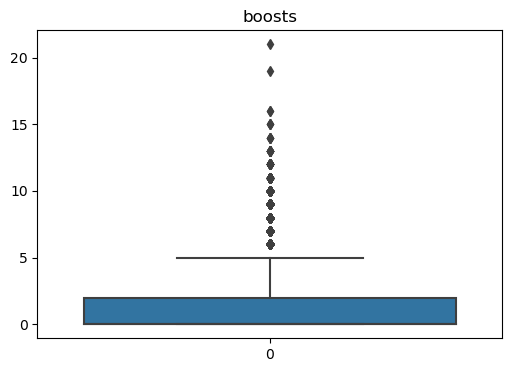

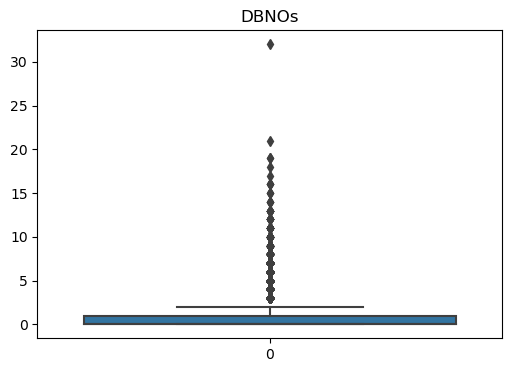

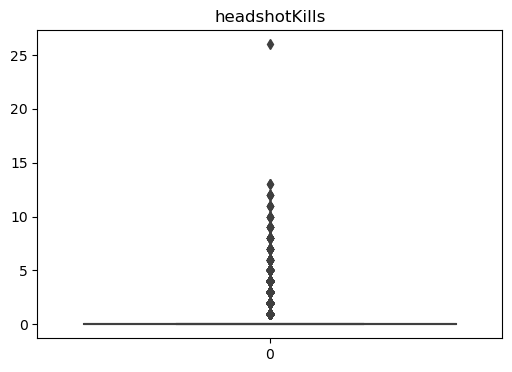

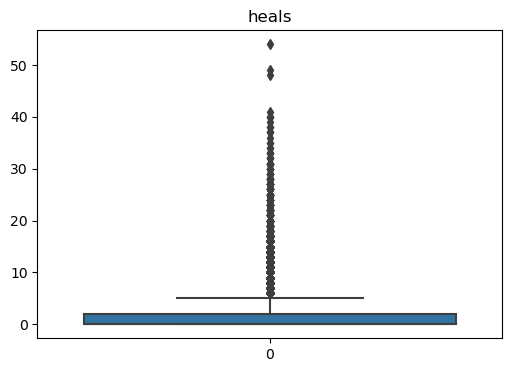

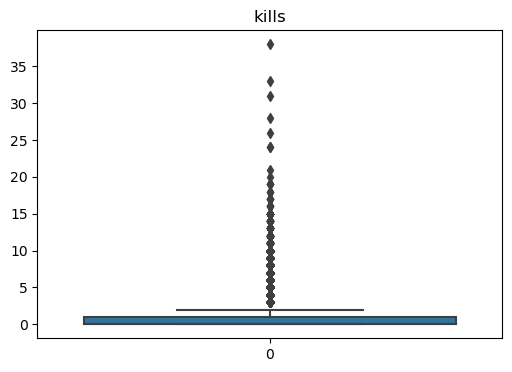

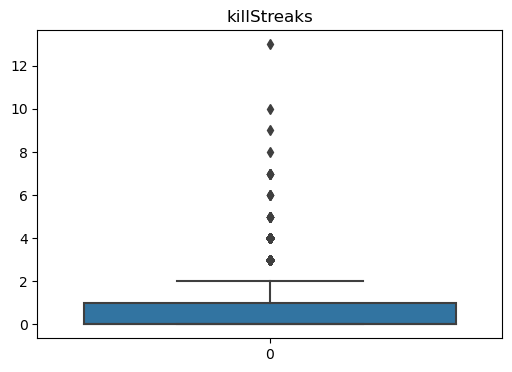

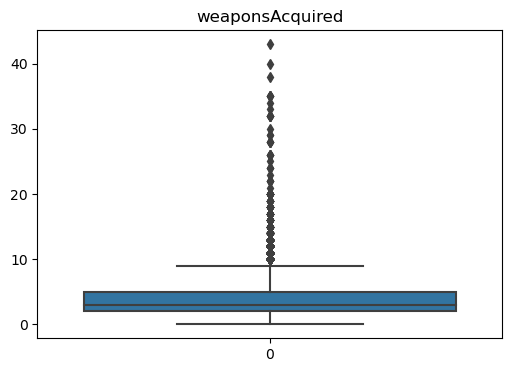

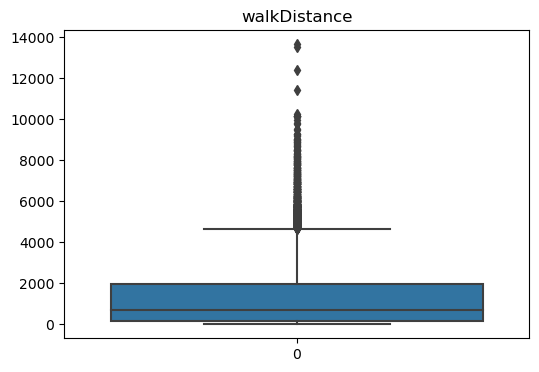

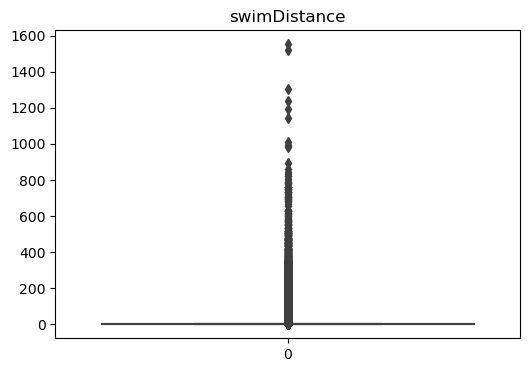

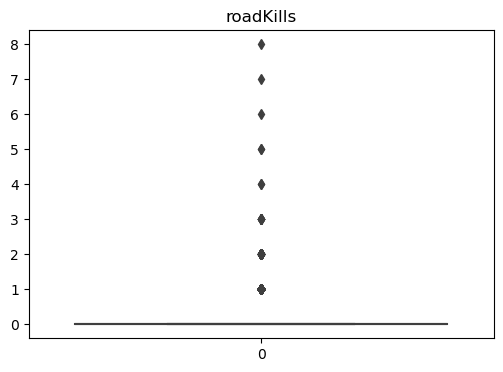

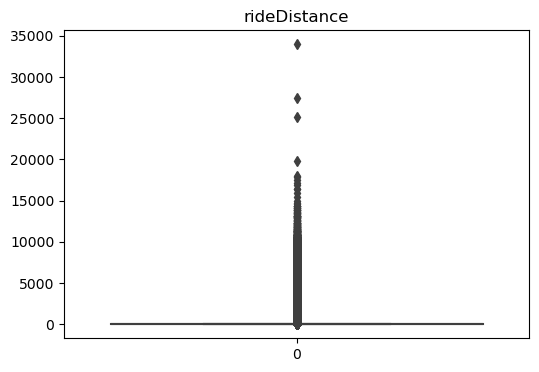

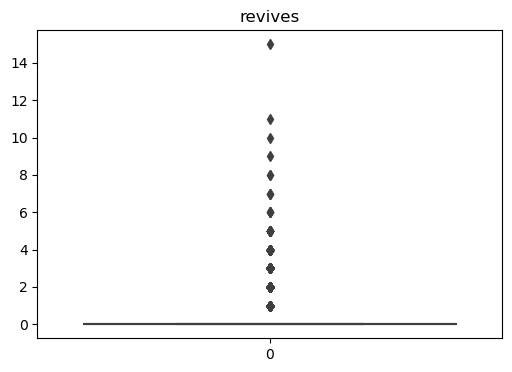

In [13]:
columns_to_analyze = ['boosts', 'DBNOs', 'headshotKills', 'heals', 'kills', 'killStreaks',
                      'weaponsAcquired', 'walkDistance', 'swimDistance', 'roadKills',
                      'rideDistance', 'revives']


plt.figure(figsize=(8, 6))

for column in columns_to_analyze:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(data=new_df[column])
    plt.title(f'{column}')
    plt.xlabel('')
    plt.show()


In [11]:
columns_to_count = ['boosts', 'DBNOs', 'headshotKills', 'heals', 'kills', 'killStreaks', 'roadKills','revives']
for i in columns_to_count:
    print(df[i].value_counts())

boosts
0     2521324
1      680252
2      491316
3      295883
4      195729
5      120271
6       70111
7       37626
8       18893
9        8638
10       3992
11       1644
12        726
13        295
14        126
15         62
16         30
17         16
18         13
19          6
21          4
20          3
24          2
33          1
28          1
23          1
22          1
Name: count, dtype: int64
DBNOs
0     2773735
1      983281
2      395119
3      162682
4       69307
5       31686
6       14977
7        7291
8        3694
9        1966
10       1110
11        643
12        466
13        275
14        177
15        137
16         87
17         80
18         64
19         34
20         30
21         26
22         18
25         16
23         14
26         11
24         10
33          7
27          6
32          3
31          3
28          3
39          2
38          1
30          1
29          1
35          1
40          1
53          1
Name: count, dtype: int64
headshotKil

## Clearly these columns have outliers
Common techniques to deal with outliers are :
Imputation 
Standard Deviation Method 
IQR
Binning

In [12]:
display(new_df.describe(include='all'))

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,188350,188350,188350,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,...,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000,188350.000000
unique,188350,86880,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7f96b2f878858a,6a292d4d1a0207,f46fdd664f9c71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,26,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.230348,1.106371,129.611833,0.649482,0.224056,1.372371,47.808022,...,0.162957,598.111716,0.003584,4.736392,0.023855,0.007836,1147.740272,3.618816,599.013932,0.473888
std,NaN,NaN,NaN,0.575781,1.719516,167.138128,1.123634,0.594604,2.695520,27.459753,...,0.466332,1486.726151,0.074329,31.240519,0.166793,0.091834,1179.417305,2.331406,737.939877,0.306448
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.600000,2.000000,0.000000,0.200000
50%,NaN,NaN,NaN,0.000000,0.000000,84.000000,0.000000,0.000000,0.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,677.300000,3.000000,0.000000,0.461500
75%,NaN,NaN,NaN,0.000000,2.000000,185.300000,1.000000,0.000000,2.000000,71.000000,...,0.000000,0.011075,0.000000,0.000000,0.000000,0.000000,1962.000000,5.000000,1494.000000,0.740700


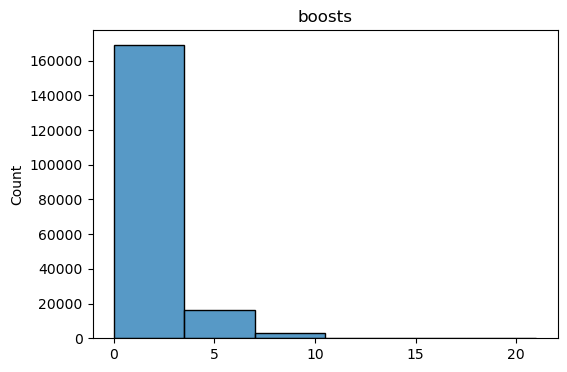

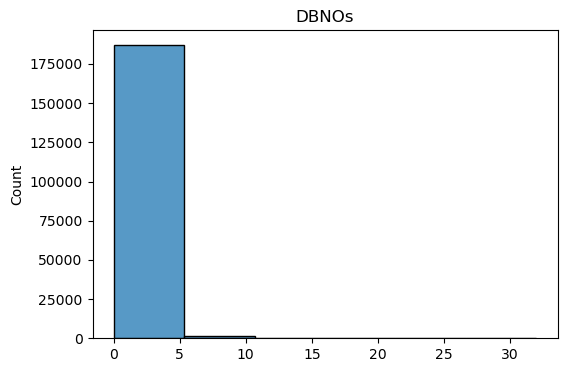

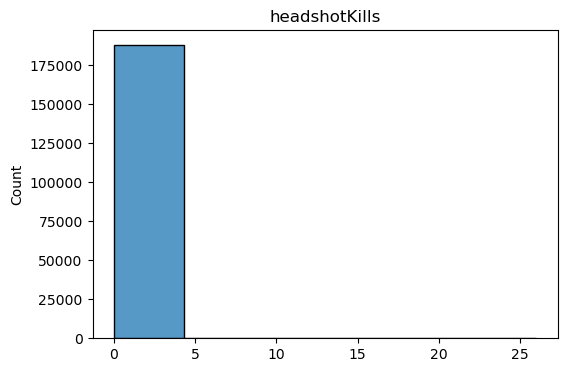

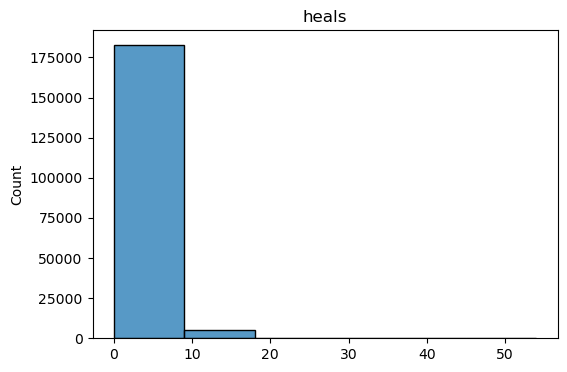

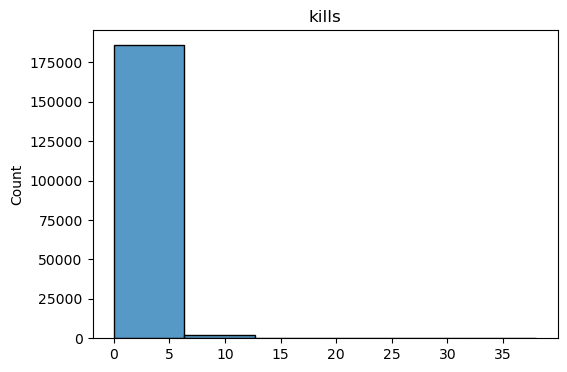

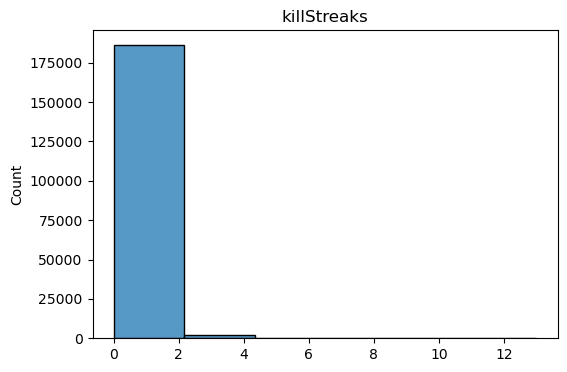

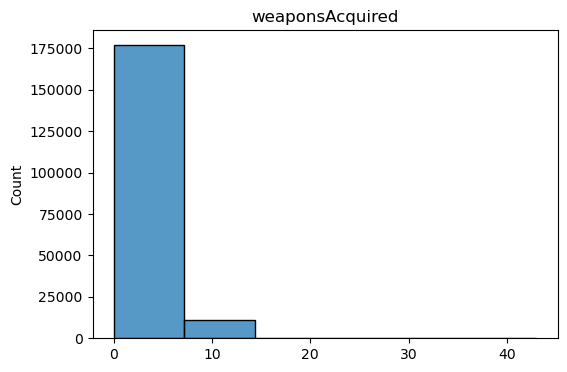

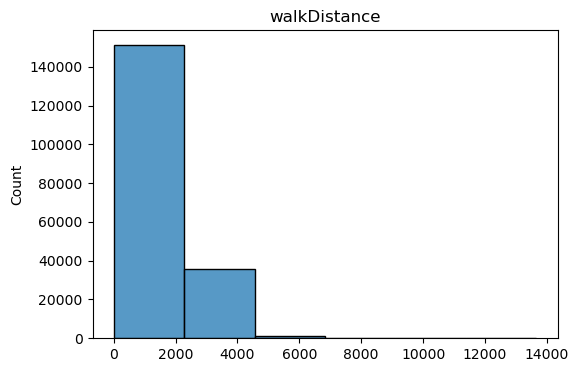

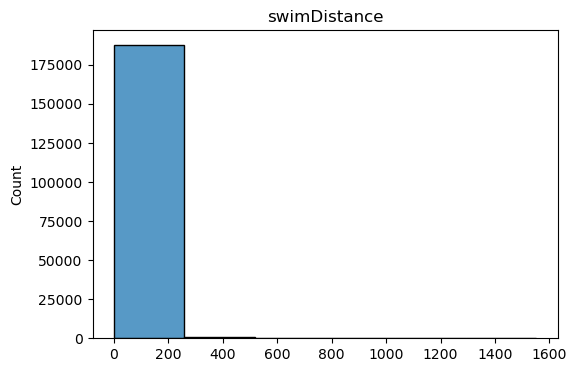

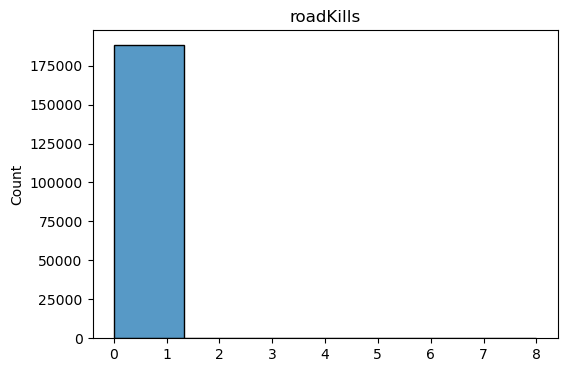

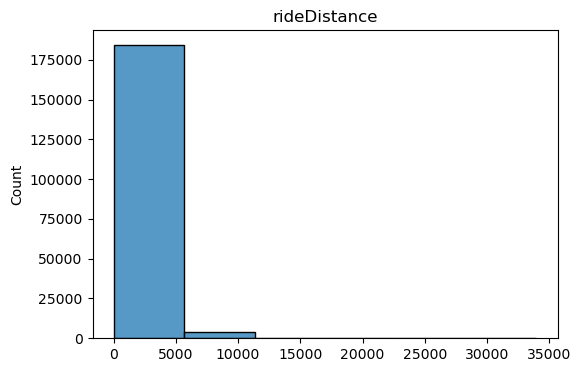

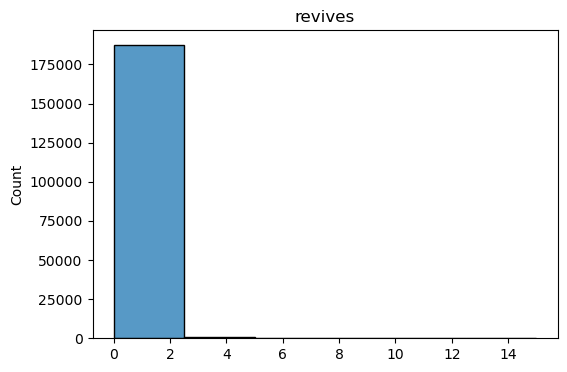

In [44]:
for column in columns_to_analyze:
    plt.figure(figsize=(6, 4))  
    sns.histplot(data=new_df[column], bins=6)
    plt.title(f'{column}')
    plt.xlabel('')
    plt.show()

### All the columns in column_to_analyze are left skewed

In [46]:
# Median of these columns 
for column in columns_to_analyze:
    print(f"{column}",new_df[column].median())

boosts 0.0
DBNOs 0.0
headshotKills 0.0
heals 0.0
kills 0.0
killStreaks 0.0
weaponsAcquired 3.0
walkDistance 677.3
swimDistance 0.0
roadKills 0.0
rideDistance 0.0
revives 0.0


## Dealing with potential Outliers with Z-Score Method

In [213]:
# Removing outliers based on specific criteria based on dataset knowledge 

In [210]:
# Conditions to remove outliers based on specific criteria
specific_conditions = (
    (new_df['revives'] <= 5) &
    (new_df['roadKills'] <= 3) &
    (new_df['killStreaks'] <= 4) &
    (new_df['assists'] <= 5)
)

# Columns for which outliers will be removed using Z-score
zscore_columns = ['assists', 'heals', 'headshotKills', 'DBNOs', 'boosts', 'weaponsAcquired', 'kills',
                  'walkDistance', 'swimDistance', 'rideDistance', 'damageDealt']

# Setting different thresholds for Z-score based outlier removal
thresholds = {
    'assists': 5, 'heals': 5, 'headshotKills': 5, 'DBNOs': 5, 'boosts': 5,
    'weaponsAcquired': 3, 'kills': 3, 'walkDistance': 10, 'swimDistance': 10,
    'rideDistance': 10, 'damageDealt': 10
}

for column in zscore_columns:
    mean = np.mean(new_df[column])
    std_dev = np.std(new_df[column])
    threshold = thresholds.get(column, 3)  # Default threshold is 3 if not specified

    z_scores = (new_df[column] - mean) / std_dev
    potential_outliers = np.abs(z_scores) > threshold

    specific_conditions &= ~potential_outliers  # Combine conditions to avoid outliers

new_df_2 = new_df[specific_conditions]


# Feature Engineering

In [217]:
# Remove unwanted columns 
new_df_3 = new_df_2.drop(['Id','groupId','matchId','killPlace','longestKill','matchDuration','numGroups'],axis=1)

In [219]:
new_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181009 entries, 0 to 4446915
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   assists          181009 non-null  int64  
 1   boosts           181009 non-null  int64  
 2   damageDealt      181009 non-null  float64
 3   DBNOs            181009 non-null  int64  
 4   headshotKills    181009 non-null  int64  
 5   heals            181009 non-null  int64  
 6   killPoints       181009 non-null  int64  
 7   kills            181009 non-null  int64  
 8   killStreaks      181009 non-null  int64  
 9   matchType        181009 non-null  object 
 10  maxPlace         181009 non-null  int64  
 11  rankPoints       181009 non-null  int64  
 12  revives          181009 non-null  int64  
 13  rideDistance     181009 non-null  float64
 14  roadKills        181009 non-null  int64  
 15  swimDistance     181009 non-null  float64
 16  teamKills        181009 non-null  int64  


In [221]:
# Splitting as Input and Target Variables
x = new_df_3.drop(['winPlacePerc'],axis=1)
y = new_df_3['winPlacePerc']

# Standardization

In [243]:
# Using Standard Scalar as it is robust to outliers 

scaler = StandardScaler()
scaler.fit_transform(x.drop('matchType',axis=1))[0]

array([-0.40137849, -0.63548237, -0.86375853, -0.61560793, -0.38914019,
       -0.53101365,  1.18933556, -0.66924146, -0.75852687, -0.70892541,
       -1.22340481, -0.34075254, -0.39021977, -0.04885736, -0.17281635,
       -0.14113992, -0.07888976, -0.73652399, -1.15303744,  1.17483464])

In [244]:
x_scaled = scaler.fit_transform(x.drop('matchType',axis=1))

## Dealing with Categorical Column

In [245]:
encoder = OneHotEncoder(sparse=False)
matchType_encoded = encoder.fit_transform(x[['matchType']])
matchType_encoded[0]

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [248]:
x_final = np.hstack((x_scaled, matchType_encoded))

In [250]:
x_final[0]

array([-0.40137849, -0.63548237, -0.86375853, -0.61560793, -0.38914019,
       -0.53101365,  1.18933556, -0.66924146, -0.75852687, -0.70892541,
       -1.22340481, -0.34075254, -0.39021977, -0.04885736, -0.17281635,
       -0.14113992, -0.07888976, -0.73652399, -1.15303744,  1.17483464,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ])

# Split

In [259]:
x_train , x_test , y_train , y_test = train_test_split(x_final , y , random_state=101 , test_size=0.3)

## Using ANN

In [306]:
import tensorflow

from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras import Sequential

In [307]:
model = Sequential()
model.add(Dense(24,activation='relu',input_dim=x_train.shape[1]))
model.add(Dropout(0.02)) # dropout layer to avoid overfitting
model.add(Dense(12,activation='relu'))
model.add(Dense(1))

In [308]:
history = model.compile( optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01), 
                            loss='mean_absolute_error')

In [309]:
%%time
historyy = model.fit(
    x_train,
    y_train,
    epochs=25,
    verbose=2,
    batch_size=500,
    validation_split = 0.2)

Epoch 1/25
203/203 - 1s - loss: 0.1171 - val_loss: 0.1034 - 1s/epoch - 7ms/step
Epoch 2/25
203/203 - 1s - loss: 0.1024 - val_loss: 0.0999 - 557ms/epoch - 3ms/step
Epoch 3/25
203/203 - 1s - loss: 0.1003 - val_loss: 0.1023 - 560ms/epoch - 3ms/step
Epoch 4/25
203/203 - 1s - loss: 0.0992 - val_loss: 0.0988 - 557ms/epoch - 3ms/step
Epoch 5/25
203/203 - 1s - loss: 0.0988 - val_loss: 0.0971 - 564ms/epoch - 3ms/step
Epoch 6/25
203/203 - 1s - loss: 0.0982 - val_loss: 0.0980 - 560ms/epoch - 3ms/step
Epoch 7/25
203/203 - 1s - loss: 0.0979 - val_loss: 0.0964 - 585ms/epoch - 3ms/step
Epoch 8/25
203/203 - 1s - loss: 0.0978 - val_loss: 0.0973 - 557ms/epoch - 3ms/step
Epoch 9/25
203/203 - 1s - loss: 0.0976 - val_loss: 0.0963 - 558ms/epoch - 3ms/step
Epoch 10/25
203/203 - 1s - loss: 0.0975 - val_loss: 0.0967 - 558ms/epoch - 3ms/step
Epoch 11/25
203/203 - 1s - loss: 0.0975 - val_loss: 0.0966 - 556ms/epoch - 3ms/step
Epoch 12/25
203/203 - 1s - loss: 0.0972 - val_loss: 0.0967 - 567ms/epoch - 3ms/step
Epoc

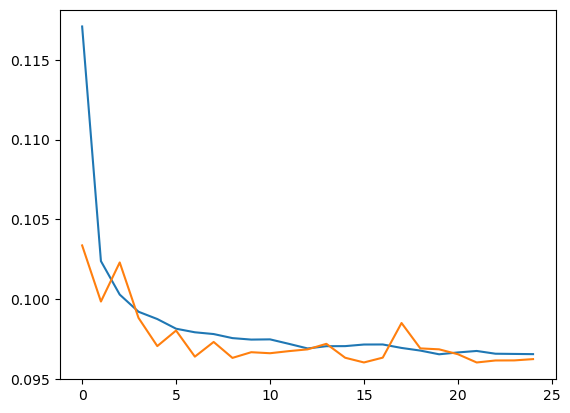

In [310]:
import matplotlib.pyplot as plt 
plt.plot(historyy.history['loss'])
plt.plot(historyy.history['val_loss'])

In [311]:
preds = model.predict(x_test)

1697/1697 [==============================] - 3s 2ms/step


In [312]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, preds)
print(f"Mean Absolute Error (MAE) on Test Dataset: {mae:.4f}")


Mean Absolute Error (MAE) on Test Dataset: 0.0965


# Using Pycaret

In [316]:
# first convert whole preprocessed dataset into a dataframe

In [331]:
print("Shape of Input Data",x_final.shape)
print("Shape of output data",y.shape)

Shape of Input Data (181009, 32)
Shape of output data (181009,)


In [332]:
y_reshaped=np.array(y).reshape(-1, 1) # make Pandas Series as array and reshape
result_array = np.concatenate((x_final, y_reshaped), axis=1) # Concatenate Input and Output variables

In [333]:
# Column names :
col1 = x.drop('matchType',axis=1).columns
col2 = encoder.get_feature_names_out(['matchType'])
col3 = ['target']  

# Making Dataframe along with all right column names 

final_df = pd.DataFrame(result_array, columns=np.concatenate((col1, col2, col3)))

In [334]:
final_df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,maxPlace,...,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo-fpp,matchType_normal-solo-fpp,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,target
0,-0.401378,-0.635482,-0.863759,-0.615608,-0.38914,-0.531014,1.189336,-0.669241,-0.758527,-0.708925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4444
1,-0.401378,-0.635482,-0.170210,-0.615608,-0.38914,-0.531014,-0.798064,-0.669241,-0.758527,-0.791328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6400
2,1.573589,-0.635482,-0.348166,-0.615608,-0.38914,-0.531014,-0.798064,-0.669241,-0.758527,0.197498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7755
3,-0.401378,-0.635482,-0.614303,-0.615608,-0.38914,-0.531014,-0.798064,-0.669241,-0.758527,-0.585322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1667
4,-0.401378,-0.635482,-0.105534,-0.615608,-0.38914,-0.531014,-0.798064,0.204353,0.740253,2.133947,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.1875


In [347]:
final_df.to_csv("pubg_preprocessed_dataset.csv")

## Rest of the work is in google collab notebook